# Welcome to the PSUICE_analysis tutorial
### I'll show you how to use the PSUICE_analysis Python package to plot and analyze model results from the Penn State University ice sheet model (PSUICE). For information about the ice sheet model, see the list of references at the end of this notebook.


### First, let's import some of the Python functions that we will need. Most of these are in the PSUICE_analysis module, but we want to be able to plot and play with data within this notebook, so we will need matplotlib and numpy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PSUICE_analysis

## First, we will read all the data from the sample output file

The script read_PSUICE_output.py takes the data from the netCDF file (which is not a user-friendly format), and loads it into memory so we can play with it in Python.

In [2]:
outputFilePath = 'Ross_Sector_10kaToPresent.nc'

modelOutput, modelVarsInfo = PSUICE_analysis.read_output(outputFilePath)

Now let's see what variables we have to work with. The function read_output puts all the data into a Python dictionary called modelOutput, and information about the variables into a dictionary of dictionaries (yes, nested dictionaries) called modelVarsInfo. 

In [3]:
%whos

Variable          Type      Data/Info
-------------------------------------
PSUICE_analysis   module    <module 'PSUICE_analysis'<...>ysis/PSUICE_analysis.py'>
modelOutput       dict      n=61
modelVarsInfo     dict      n=61
np                module    <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
outputFilePath    str       Ross_Sector_10kaToPresent.nc
plt               module    <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


Above, we see that we have the numpy, matplotlib.pyplot, and PSUICE_analysis packages loaded, as well as the path to our model output file (outputFilePath), and the two dictionaries modelOutput and modelVarsInfo. You can access the data in the dictionary using modelOutput[variable_name]. Let's look at all the variables within modelOutput.

In [4]:
print(modelOutput.keys())

dict_keys(['alatd', 'alond', 'basefrml', 'baseperc', 'budgall', 'budgmelt', 'budgrain', 'budgsnow', 'calvice', 'calviceav', 'cliffmelt', 'cliffmeltav', 'darea', 'deflect', 'dgeoid', 'enhanceinv', 'facemelt', 'facemeltav', 'fedge', 'fluxsch', 'fract', 'geoflux', 'h', 'hb', 'hbsd', 'hs', 'logcrhmel', 'maskwater', 'msector', 'oceanmelt', 'oceanmeltav', 'runfrozav', 'runliqav', 'sealev', 'tamax', 'tb', 'tbhomol', 'thickwarm', 'time', 'topbedeq', 'tota', 'totaf', 'totag', 'toti', 'totif', 'totig', 'ts', 'ua', 'ubot', 'utop', 'va', 'vbot', 'vershis', 'vtop', 'wab', 'was', 'x0', 'x1', 'y0', 'y1', 'z'])


As you can see, we have a lot of variables to play with. But it's not always obvious what each of these represents. For instance, what could 'tbhomol' possible mean? And 'facemelt'?! What are the units of these variables? As I said above, there is a dictionary of dictionaries called modelVarsInfo that contains explanations. You can see what information is available like this:

In [5]:
modelVarsInfo['tbhomol'].keys()

dict_keys(['longName', 'units', 'dimensions', 'shape'])

Let's see what the units of tbhomol are.

In [6]:
modelVarsInfo['tbhomol']['units']

'C'

Looks like tbhomol is in degrees C. Instead of doing this for each individual attribute of each variable, let's just use the get_variable_info function to print info about a few of them.

In [7]:
PSUICE_analysis.get_variable_info(modelVarsInfo, ['tbhomol', 'facemelt', 'x1', 'va', 'ua'])

Info for variable tbhomol:
Description: basal homologous temperature
Units: C
Dimensions: ('time', 'y1', 'x1')
Shape:(50, 170, 125)


Info for variable facemelt:
Description: facemelt rate
Units: m/y
Dimensions: ('time', 'y1', 'x1')
Shape:(50, 170, 125)


Info for variable x1:
Description: x coordinate, h,v-grids
Units: km
Dimensions: ('x1',)
Shape:(125,)


Info for variable va:
Description: average ice y-velocity
Units: m/y
Dimensions: ('time', 'y0', 'x1')
Shape:(50, 170, 125)


Info for variable ua:
Description: average ice x-velocity
Units: m/y
Dimensions: ('time', 'y1', 'x0')
Shape:(50, 170, 125)




## Plotting timeseries

Okay, we're all ready to begin plotting up the data! Let's first look at a simple case. Say you want to plot handful of timeseries variables like totig (total grounded ice volume), totag (total grounded ice area), and sea level.

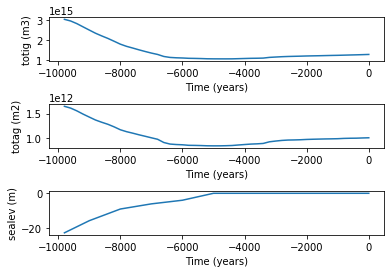

In [8]:
PSUICE_analysis.plot_timeseries(modelOutput, modelVarsInfo, ['totig', 'totag', 'sealev'])

## Plotting maps of model output

Often we will want to plot maps of a model output field. This is more complicated because we are dealing with data that vary in both time and space. The function plot_maps will plot the desired output field at the desired time. You can specify either a time level (e.g., the 12th output time), or a model time (e.g., 10000 years ago). Model time in the past is negative; future is positive. If the model time you enter is not available, the function plots up the closest available time. If no time is specified, the function plots the last timelevel in modelOutput.

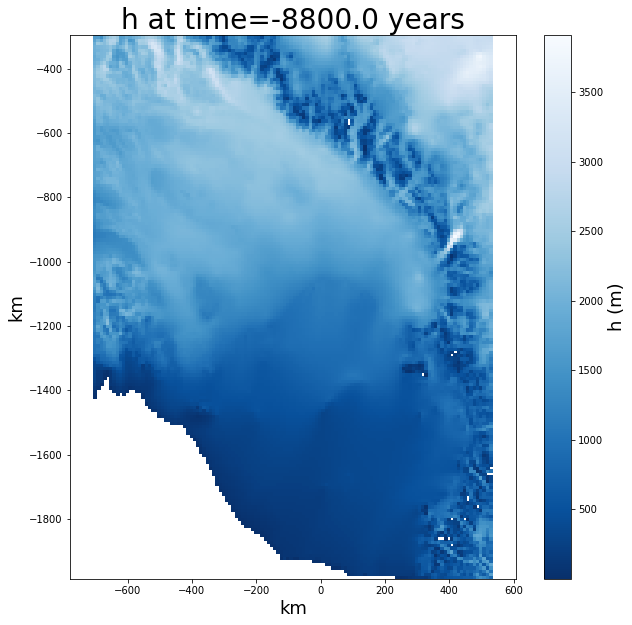

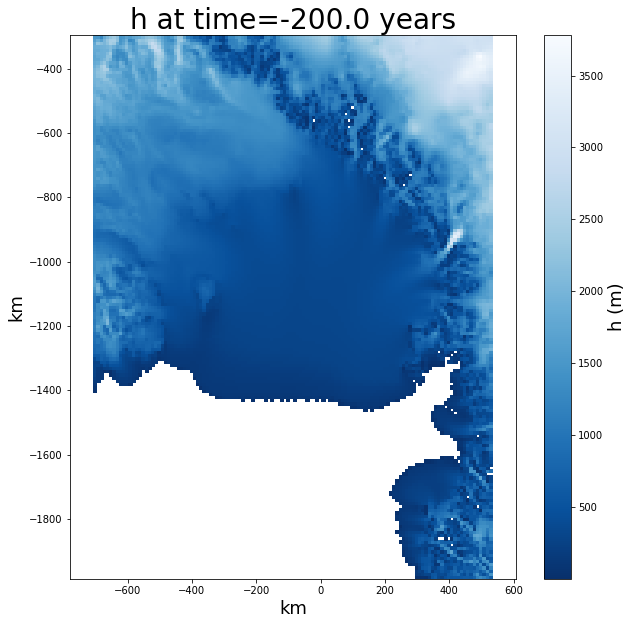

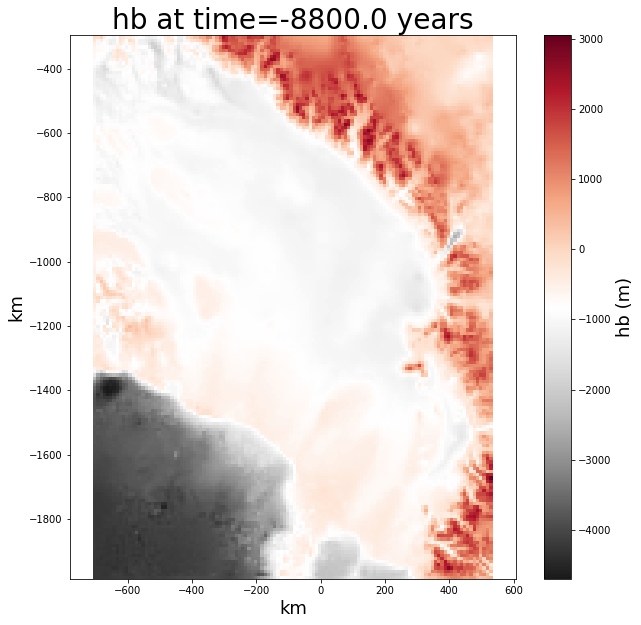

(<Figure size 720x720 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xb2e8adb50>)

In [9]:
PSUICE_analysis.plot_maps(modelOutput, modelVarsInfo, varName='h', cmap='Blues_r', timeLevel=5, maskIce=True)
PSUICE_analysis.plot_maps(modelOutput, modelVarsInfo, varName='h', cmap='Blues_r', timeLevel=-2, maskIce=True)
PSUICE_analysis.plot_maps(modelOutput, modelVarsInfo, varName='hb', cmap='RdGy_r', timeLevel=5, maskIce=False)

## Calculate velocity field
Unfortunately for us map-plotters, the PSU ice sheet model calculates x and y velocity components on separate grids. 
(This is for reasons of numerical accuracy, see Pollard and Deconto (2012) for more information if you are interested.) That makes it hard to plot velocity on a map. Fortunately, there is PSUICE_analysis tool called regrid_velocity that will put the velocity fields on the same grid as ice thickness (h). This is not called automatically in read_output because it can slow things down for large files due to looping through time-levels. but when you want those fields, simply call that function to calculate and add those to your modelOutput and modelVarsInfo dictionaries:

In [10]:
modelOutput, modelVarsInfo = PSUICE_analysis.regrid_velocity(modelOutput, modelVarsInfo)
PSUICE_analysis.get_variable_info(modelVarsInfo, ['surfaceSpeed', 'depthAvgSpeed', 'basalSpeed'])

/Users/trevorhillebrand/Documents/PSUICE/PSUICE_analysis/PSUICE_analysis.py:100: RuntimeWarning: invalid value encountered in greater
  iceMask = modelOutput['h']>1 # Create mask because interpolation will interpolate velocities onto ice-free areas


Info for variable surfaceSpeed:
Description: Ice velocity at surface, interpolated onto x1,y1 grid
Units: m/y
Dimensions: ('time', 'y1', 'x1')
Shape:(50, 170, 125)


Info for variable depthAvgSpeed:
Description: Depth-averaged ice velocity, interpolated onto x1,y1 grid
Units: m/y
Dimensions: ('time', 'y1', 'x1')
Shape:(50, 170, 125)


Info for variable basalSpeed:
Description: Ice velocity at bottom, interpolated onto x1,y1 grid
Units: m/y
Dimensions: ('time', 'y1', 'x1')
Shape:(50, 170, 125)




The regrid_velocity function calls another, more general function called regrid_data. You can use that if you have other fields you want to interpolate. For now, you probably won't need to.

Now let's use those new velocity variables to make a few maps!

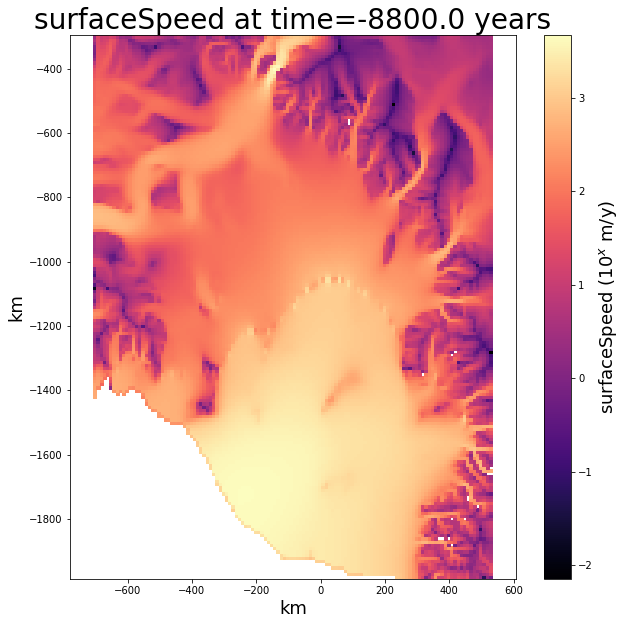

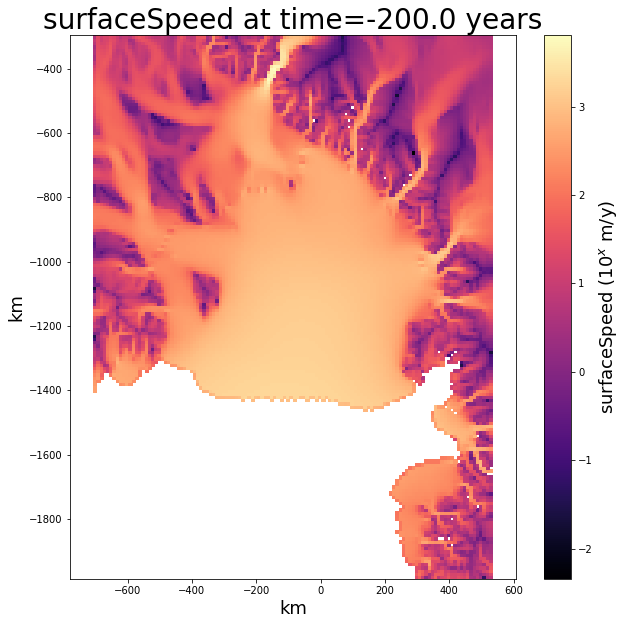

In [11]:
PSUICE_analysis.plot_maps(modelOutput, modelVarsInfo, varName='surfaceSpeed', logScale=True, cmap='magma', timeLevel=5)
fig, ax = PSUICE_analysis.plot_maps(modelOutput, modelVarsInfo, varName='surfaceSpeed', logScale=True, cmap='magma', timeLevel=-2)

Now what if we wanted to plot a single flowline (or a bunch?!) on top of maps of ice velocity (or any other field)? Use the flowline function!

In [12]:
flowlineX1, flowlineY1 = PSUICE_analysis.flowline(modelOutput, -85000, -1140000, timeLevel=-1, max_iter = 1e5)
flowlineX2, flowlineY2 = PSUICE_analysis.flowline(modelOutput, -275000, -1000000, timeLevel=-1, max_iter = 1e5)
flowlineX3, flowlineY3 = PSUICE_analysis.flowline(modelOutput, 275000, -1000000, timeLevel=-1, max_iter = 1e5)

Performing flowline calculation for time-level -1
time-level -1 took 185 iterations.
Performing flowline calculation for time-level -1
time-level -1 took 99999 iterations.
Performing flowline calculation for time-level -1
time-level -1 took 509 iterations.


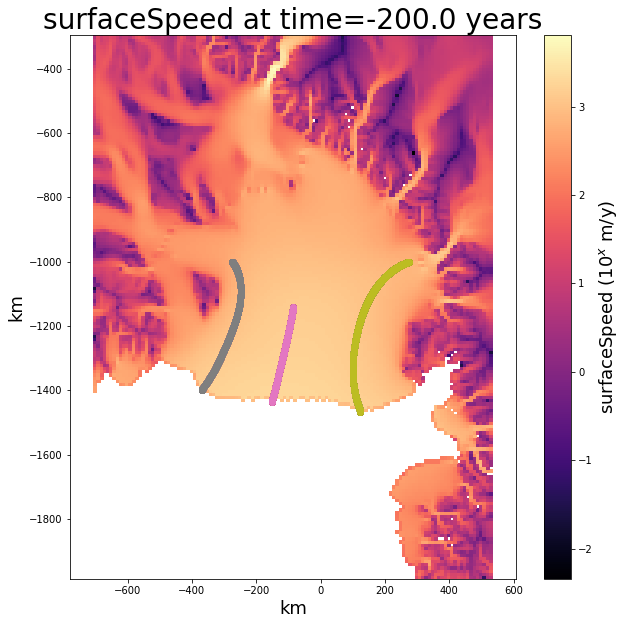

In [15]:
ax.scatter(flowlineX1/1000., flowlineY1/1000.)
ax.scatter(flowlineX2/1000., flowlineY2/1000.)
ax.scatter(flowlineX3/1000., flowlineY3/1000.)
fig
